<a href="https://colab.research.google.com/github/nataliatasso/gatunati.github.io/blob/master/NataliaTasso_estatistica_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística Frequências e Medidas
## **Desafio Final**
Considerando a base de dados de enem_2023.json responda as questões abaixo (os dados são fictícios). Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem doanoanteriorparaalinhar melhor as estratégias do cursinho para cada estudante.
O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de 1000 pessoas, sendo cada uma delas uma linha.

In [ ]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [ ]:
df_enem = pd.read_json('/content/drive/MyDrive/Colab Notebooks/enem_2023.json')
df_enem.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


1. Qual das disciplinas tem a maior amplitude de nota?



In [ ]:
amplitude = df_enem.iloc[:, :-1].max() - df_enem.iloc[:, :-1].min()

disciplina_maior_amplitude = amplitude.idxmax()

print(f'A disciplina com maior amplitude de notas é {disciplina_maior_amplitude} com amplitude de {amplitude[disciplina_maior_amplitude]:.2f}.')

A disciplina com maior amplitude de notas é Redação com amplitude de 729.16.


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [ ]:
# Calcular a média para cada disciplina
media = df_enem[['Linguagens', 'Ciências humanas',	'Ciências da natureza',	'Matemática',	'Redação']].mean()

# Calcular a mediana para cada disciplina, removendo os valores nulos
mediana = df_enem[['Linguagens', 'Ciências humanas',	'Ciências da natureza',	'Matemática',	'Redação']].median(skipna = True)

# Exibir os resultados
media_mediana = pd.DataFrame({
    'Média': media,
    'Mediana': mediana
})

print (media_mediana)

                           Média     Mediana
Linguagens            514.524809  515.045250
Ciências humanas      527.042281  524.519920
Ciências da natureza  499.315583  500.479263
Matemática            535.965660  533.247767
Redação               637.783532  635.273973


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:
* Redação- 2
* Matemática e suas Tecnologias- 4
* Linguagens, Códigos e suas Tecnologias- 2
* Ciências Humanas e suas Tecnologias- 1
* Ciências da Natureza e suas Tecnologias- 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?


In [ ]:
# Calcular a nota ponderada de cada estudante
df_enem['Nota Final'] = (
    df_enem['Redação'] * 2 +
    df_enem['Matemática'] * 4 +
    df_enem['Linguagens'] * 2 +
    df_enem['Ciências humanas'] * 1 +
    df_enem['Ciências da natureza'] * 1
) / 10

# Ordenar as notas das maiores para a menores e selecionar as 500 maiores
maiores_500 = df_enem.sort_values('Nota Final', ascending = False).head(500)

# Calcular a média e DP das 500 maiores notas
media_500 = maiores_500['Nota Final'].mean()
dp_500 = maiores_500['Nota Final'].median()

# Exibir os resultados
print(f"A média das notas dos 500 melhores estudantes foi {media_500:.2f}.")
print(f"O desvio padrão das notas dos 500 melhores estudante foi {dp_500:.2f}.")

A média das notas dos 500 melhores estudantes foi 557.29.
O desvio padrão das notas dos 500 melhores estudante foi 553.73.


4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [ ]:
# Selecionar as 40 maiores notas
maiores_40 = maiores_500.head(40)

# Calcular a média e a variância dessas 40 maiores notas
media_40 = maiores_40['Nota Final'].mean()
variancia_40 = maiores_40['Nota Final'].var()

# Exibir os resultados
print(f"A média dos 40 aprovados foi de {media_40:.2f}.")
print(f"A variância dos 40 aprovados foi de {variancia_40:.2f}.")

A média dos 40 aprovados foi de 636.68.
A variância dos 40 aprovados foi de 295.77.


5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [ ]:
# Calcular o valor do terceiro quartil de ambas
q3_math = df_enem['Matemática'].quantile(0.75)
q3_lingua = df_enem['Linguagens'].quantile(0.75)

# Exibir os resultados
print(f"O terceiro quartil de Matemática é {q3_math:.2f}.")
print(f"O terceiro quartil de Linguagens é {q3_lingua:.2f}.")

O terceiro quartil de Matemática é 592.91.
O terceiro quartil de Linguagens é 571.64.


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?



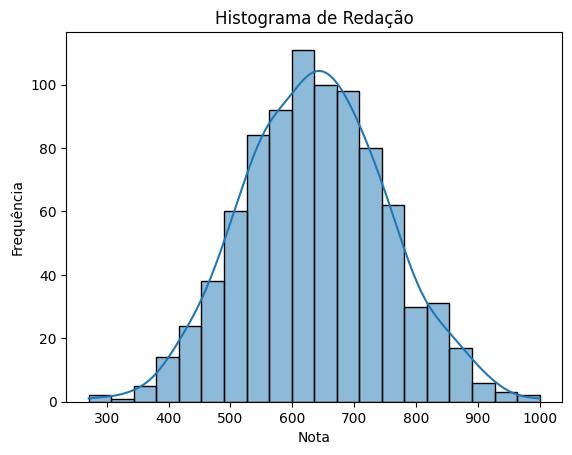

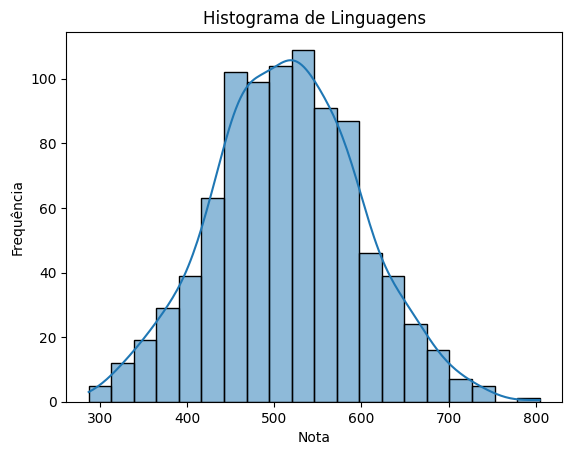

In [ ]:
# Desconsiderando os valores ausentes, os gráficos ficariam assim:

# Histograma de Redação
sns.histplot(df_enem['Redação'], bins = 20, kde = True)
plt.title('Histograma de Redação')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

# Histograma de Linguagens
sns.histplot(df_enem['Linguagens'], bins = 20, kde = True)
plt.title('Histograma de Linguagens')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

**Resposta**: sem os valores ausentes, os histogramas parecem simétricos e unimodais, por causa do formato da curva, onde a maior frequência de dados está concentrada no centro do gráfico e frequências menores nos lados.

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

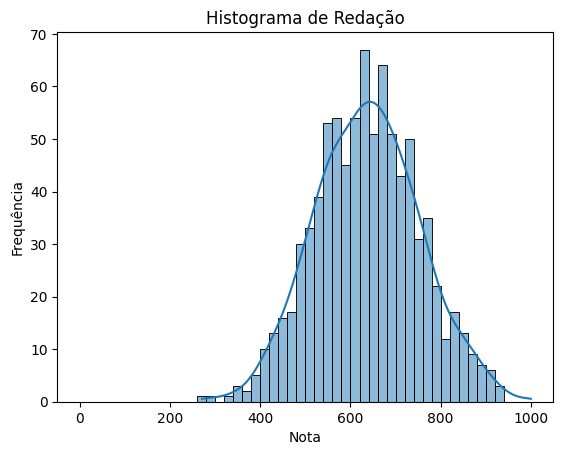

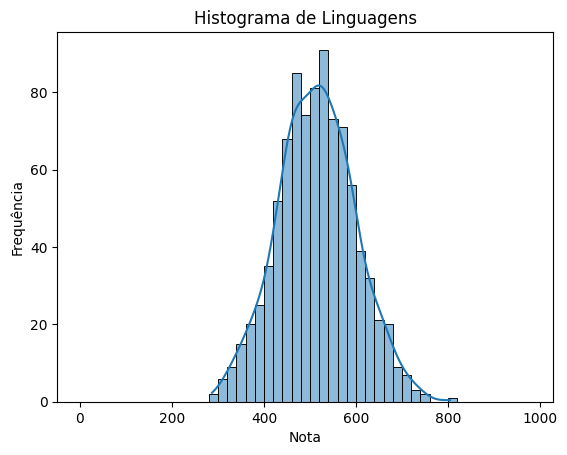

In [ ]:
# Histograma de Redação com range fixo
sns.histplot(df_enem['Redação'], bins = range(0, 1000, 20), kde = True)
plt.title('Histograma de Redação')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

# Histograma de Linguagens com range fixo
sns.histplot(df_enem['Linguagens'], bins = range(0, 1000, 20), kde = True)
plt.title('Histograma de Linguagens')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

**Resposta**: sem os valores ausentes, os histogramas continuam parecendo simétricos e unimodais, por causa do formato da curva, onde a maior frequência de dados está concentrada no centro do gráfico e frequências menores nos lados.

8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.

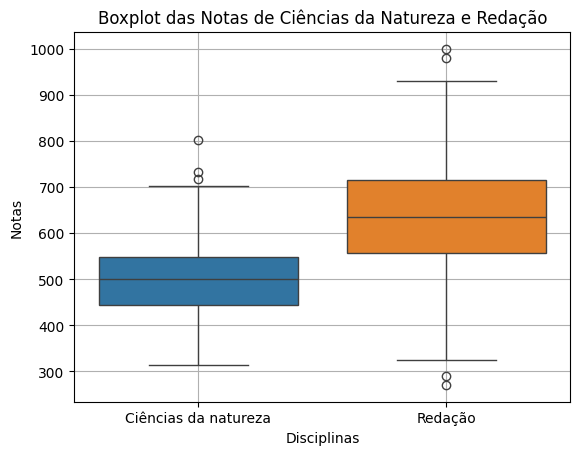


Outliers na disciplina Ciências da natureza:
325    802.004568
482    732.502964
483    718.396061
Name: Ciências da natureza, dtype: float64

Outliers na disciplina Redação:
9       270.839965
545     290.308608
720    1000.000000
870     981.016553
Name: Redação, dtype: float64


In [ ]:
# Selecionando as disciplinas de ciências da naturez e redação
disciplinas = ['Ciências da natureza', 'Redação']

# Fazer o boxplot
sns.boxplot(data = df_enem[disciplinas])
plt.title('Boxplot das Notas de Ciências da Natureza e Redação')
plt.xlabel('Disciplinas')
plt.ylabel('Notas')
plt.grid(True)
plt.show()

# Identificar outliers pelo método IQR de cada disciplina
CN_Q1 = df_enem['Ciências da natureza'].quantile(0.25)
CN_Q3 = df_enem['Ciências da natureza'].quantile(0.75)
CN_IQR = CN_Q3 - CN_Q1

R_Q1 = df_enem['Redação'].quantile(0.25)
R_Q3 = df_enem['Redação'].quantile(0.75)
R_IQR = R_Q3 - R_Q1

# Definir os limites de cada disciplina
CN_lower_bound = CN_Q1 - 1.5 * CN_IQR
CN_upper_bound = CN_Q3 + 1.5 * CN_IQR

R_lower_bound = R_Q1 - 1.5 * R_IQR
R_upper_bound = R_Q3 + 1.5 * R_IQR

# Encontrar outliers de cada disciplina
CN_outliers = df_enem[(df_enem['Ciências da natureza'] < CN_lower_bound) | (df_enem['Ciências da natureza'] > CN_upper_bound)]
R_outliers = df_enem[(df_enem['Redação'] < R_lower_bound) | (df_enem['Redação'] > R_upper_bound)]

# Printar os outliers de cada disciplina
print(f'\nOutliers na disciplina {"Ciências da natureza"}:')
print(CN_outliers['Ciências da natureza'])

print(f'\nOutliers na disciplina {"Redação"}:')
print(R_outliers['Redação'])

Os outliers são facilmente identificáveis no gráfico de boxplot, representados pelos pontos que aparecem acima ou abaixo das linhas correspondentes ao Q1 e ao Q3. No gráfico, observamos três outliers em Ciências da Natureza e quatro em Redação. Além disso, o código utilizado também selecionou e listou esses outliers em uma tabela, indicando seus índices no banco de dados e os respectivos valores.

9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [ ]:
# Criar uma cópia do dataframe original
df_enem_sem_outliers = df_enem.copy()

# Listar as disciplinas
disciplinas = ['Ciências da natureza', 'Redação']

# Remover outliers usando o método Z-score
for disciplina in disciplinas:
    media = df_enem_sem_outliers[disciplina].mean()
    desvio_padrao = df_enem_sem_outliers[disciplina].std()
    zscore = (df_enem_sem_outliers[disciplina] - media) / desvio_padrao

# Definir os limites para outliers
df_enem_sem_outliers = df_enem_sem_outliers[np.abs(zscore) <= 3]

# Calcular as médias antes e depois da remoção dos outliers
medias_originais = df_enem[disciplinas].mean()
medias_sem_outliers = df_enem_sem_outliers[disciplinas].mean()

# Comparar as médias e calcular a diferença percentual
diferenca_percentual = ((medias_sem_outliers - medias_originais) / medias_originais) * 100

# Exibir os resultados
print("Médias originais:")
print(medias_originais)
print("\nMédias sem outliers:")
print(medias_sem_outliers)
print("\nDiferença percentual:")
print(diferenca_percentual)

# Verificar se a diferença é significativa (maior que 5%)
significativa = diferenca_percentual.abs() > 5
print("\nA diferença é significativa (maior que 5%)?")
print(significativa)

Médias originais:
Ciências da natureza    499.315583
Redação                 637.783532
dtype: float64

Médias sem outliers:
Ciências da natureza    501.139492
Redação                 637.972887
dtype: float64

Diferença percentual:
Ciências da natureza    0.365282
Redação                 0.029690
dtype: float64

A diferença é significativa (maior que 5%)?
Ciências da natureza    False
Redação                 False
dtype: bool


**Resposta**: Assim, observamos que retirar os outliers não alterou a média nacional de forma significativa (considerando como significativa uma diferença superior a 5%).

10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [ ]:
# Selecionar as disciplinas
disciplinas_todas = ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']

# Função para substituir nulos e calcular impacto
def substituir_nulos_e_calcular(df, metodo):
    df_copia = df.copy()  # Copiar o DataFrame original

    for disciplina in disciplinas_todas:
        if metodo == 'media':
            valor_substituir = df[disciplina].mean()
        elif metodo == 'mediana':
            valor_substituir = df[disciplina].median()
        elif metodo == 'moda':
            valor_substituir = df[disciplina].mode()[0]  # Usar a primeira moda

        # Substituir valores nulos
        df_copia[disciplina].fillna(valor_substituir, inplace=True)

    # Calcular a média geral e desvio padrão geral após a substituição
    media_geral = df_copia[disciplinas_todas].mean().mean()
    desvio_padrao_geral = df_copia[disciplinas_todas].std().mean()

    return media_geral, desvio_padrao_geral

# Calcular a média e desvio padrão antes de substituir os nulos
media_original = df_enem[disciplinas_todas].mean().mean()
desvio_original = df_enem[disciplinas_todas].std().mean()

# Calcular para cada método
media_media, desvio_media = substituir_nulos_e_calcular(df_enem, 'media')
media_mediana, desvio_mediana = substituir_nulos_e_calcular(df_enem, 'mediana')
media_moda, desvio_moda = substituir_nulos_e_calcular(df_enem, 'moda')

# Função para calcular diferença percentual
def diferenca_percentual(original, novo):
    return abs((novo - original) / original) * 100

# Calcular diferença percentual para média e desvio padrão
dif_media = diferenca_percentual(media_original, media_media)
dif_mediana = diferenca_percentual(media_original, media_mediana)
dif_moda = diferenca_percentual(media_original, media_moda)

dif_desvio_media = diferenca_percentual(desvio_original, desvio_media)
dif_desvio_mediana = diferenca_percentual(desvio_original, desvio_mediana)
dif_desvio_moda = diferenca_percentual(desvio_original, desvio_moda)

# Exibir resultados
print("Diferença percentual na média geral:")
print(f"Média: {dif_media:.2f}%")
print(f"Mediana: {dif_mediana:.2f}%")
print(f"Moda: {dif_moda:.2f}%")

print("\nDiferença percentual no desvio padrão geral:")
print(f"Média: {dif_desvio_media:.2f}%")
print(f"Mediana: {dif_desvio_mediana:.2f}%")
print(f"Moda: {dif_desvio_moda:.2f}%")

Diferença percentual na média geral:
Média: 0.00%
Mediana: 0.02%
Moda: 5.12%

Diferença percentual no desvio padrão geral:
Média: 5.88%
Mediana: 5.87%
Moda: 28.41%


**Resposta**: a substituição de valores nulos pela média ou mediana causa um impacto mínimo na média geral. O mesmo se aplica ao desvio padrão, onde substituir valores nulos por média ou mediana resulta em menor impacto. No entanto, a substituição pela moda poderia ter um impacto significativo tanto na média geral quanto no desvio padrão, tornando-a a opção menos adequada para substituição de valores nulos.